## Лабораторная работа. Знакомство с библиотеками для анализа данных

### О задании

Лабораторная работа направлена на работу с пакетами NumPy, Pandas и Matplotlib путём решения набора задач. В данном задании разрешено пользоваться только стандартной библиотекой языка Python, а также пакетами NumPy, Pandas и Matplotlib. Целью задания является редактирование данного jupyter notebook-a (в части блоков с кодом на python) таким образом, чтобы были реализованы указанные в задании функции.

### Знакомство с Numpy

Во всех заданиях данного раздела запрещено использовать циклы (ключевые слова *for* и *while*), [list comprehension](https://habrahabr.ru/post/30232/), [map и т.п.](http://pythonicway.com/python-functinal-programming)

Для каждой задачи приведите примеры использования реализованных функций.

Под матрицей в заданиях понимается двумерный [numpy.array](https://docs.scipy.org/doc/numpy/reference/generated/numpy.array.html)

In [1]:
import numpy as np

**(0.25 балла) Задание 1.** Реализуйте функцию, принимающую на вход матрицу ```X``` и два массива индексов ```indices1``` и ```indices2``` одинаковой длины и возвращающую np.array, состоящий из последовательности элементов 

```[X[indices1[0], indices2[0]], ... , X[indices1[N-1], indices2[N-1]]]```

In [2]:
def construct_array(X, indices1, indices2):
    return X[indices1, indices2]

**(0.25 балла) Задача 2.** Реализуйте функцию, которая на вход принимает два массива ```X``` и ```Y``` (массивы могут быть n-мерные, но их размерности должны совпадать), а возвращает **True** если они равны и **False** - иначе.

In [3]:
def detect_identic(X, Y):
    return np.array_equal(X, Y)

**(0.25 балла) Задание 3.** Реализуйте функцию, которая на вход принимает цветное изображение ```X``` (трехмерный вектор размера (n, m, 3)) и возвращает среднее значение по трём каналам (вектор длины 3).

In [4]:
def mean_channel(X):
    return np.mean(X, axis=(1, 0))

**(0.25 балла) Задание 4.** Реализуйте функцию, принимающую на вход матрицу ```X``` и некоторое число ```a``` и возвращающую ближайший к числу элемент матрицы.

Например, для ```X = np.arange(0,10).reshape((2, 5))``` и ```a = 3.6``` ответом будет 4.

In [5]:
def nearest_value(X, a):
    return X.flat[np.abs(X - a).argmin()]

**(0.5 балла) Задача 5.** Реализуйте функцию, принимающую на вход два одномерных массива ```x``` и ```y``` и возвращающую матрицу, в которой первый массив соответствует первому столбцу матрицы, второй - второму.

В этом задании **запрещается** пользоваться операцией транспонирования и рекомедуется воспользоваться методом [reshape](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.reshape.html).

In [6]:
def construct_matrix(x, y):
    return np.concatenate((x.reshape(x.shape[0], 1), y.reshape(y.shape[0], 1)), axis=1)

**(0.5 балла) Задание 6.** Реализуйте функцию, которая на вход принимает вектор ```x```, содержащий целые числа, кроме 0, а возвращает вектор со вставленными нулями между числами.

Например, из ```[1, -5, 3]``` получить ```[1, 0, -5, 0, 3]```

In [7]:
def add_zeros(x):
    return np.dstack((x, np.zeros_like(x))).reshape((x.shape[0] * 2))[:-1]

**(0.75 балла) Задание 7.** Реализуйте функцию для подсчёта произведения ненулевых элементов на диагонали прямоугольной матрицы

Например, для ```X = np.array([[1, 0, 1], [2, 0, 2], [3, 0, 3], [4, 4, 4]])``` ответом является 3. Если ненулевых элементов нет, функция должна возвращать ```None```.

In [8]:
def nonzero_product(X):
    min_shape = np.min(X.shape)
    diag = X[np.arange(min_shape), np.arange(min_shape)]
    
    if np.sum(diag) == 0:
        return None
    diag[diag == 0] = 1
    return np.product(diag)

**(0.75 балла) Задание 8.** Реализуйте функцию, возвращающую максимальный элемент в массиве ```X``` среди элементов, перед которыми стоит нулевой.

Например, для ```X = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])``` ответом является 5. Если подходящих элементов нет, функция должна возвращать ```None```.

In [9]:
def max_element(X):
    args = np.nonzero(X == 0)[0] + 1
    if args.size == 0 or args.size == 1 and args[-1] == X.shape[0]:
        return None
    if args[-1] == X.shape[0]:
        args = args[:-1]
    return np.max(X[args])
    

**(0.75 балла) Задание 9.** Реализуйте функцию, принимающую на вход матрицу ```X``` и возвращающую все её уникальные строки в виде матрицы.

In [10]:
#Если порядок не важен
def get_unique_rows(X):
    return np.unique(X, axis=0) 

#Если порядок важен
def get_unique_rows_not_sorted(X):
    return X[np.sort(np.unique(X, axis=0, return_index=True)[1])] 

**(0.75 балла) Задача 10.** Реализуйте функцию, каторая во входной вещественной матрице ```X``` находит все значения ```nan``` и заменяет их на среднее арифметическое всех остальных элементов. Если все элементы матрицы ```nan```, то верните нулевую матрицу той же размерности.

In [11]:
def replace_nans(X):
    mask = np.isnan(X)
    if np.sum(mask) == X.size:
        return np.zeros_like(X)
    X[mask] = np.mean(X[~mask])
    return X

**(1 балл) Задача 11.** Напишите функцию, генерирующую [матрицу Вандермонда](https://ru.wikipedia.org/wiki/Определитель_Вандермонда), принемающую на вход вектор $(x_1, ... , x_n)$.

В этом задании **запрещается** пользоваться готовыми реализациями (например, [numpy.vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html)), а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html).

In [12]:
def vander(x):
    return x[:, np.newaxis] ** np.arange(x.shape[0] - 1, -1, -1)

**(1 балл) Задача 12.** Даны две вещественные матрицы ```X``` и ```Y``` с одинаковым числом столбцов и, в общем случае, различным числом строк. Необходимо реализовать функцию, вычисляющую матрицу попарных [косинусных коэффициентов](https://en.wikipedia.org/wiki/Cosine_similarity) между всеми $X_i и Y_j$, где $X_i$ - $i$-ая строка матрицы $X$, а $Y_j$ - $j$-ая строка матрицы $Y$. 

В этом задании **запрещается** пользоваться готовыми реализациями, а также [np.repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) и [np.transpose](https://docs.scipy.org/doc/numpy/reference/generated/numpy.transpose.html).

При решение задействуйте [np.reshape](https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html) и/или [np.newaxis](https://docs.scipy.org/doc/numpy-1.13.0/reference/arrays.indexing.html), [np.sqrt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sqrt.html), [np.sum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.sum.html) и [np.power](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [13]:
def cos_coefs(X, Y):
    numerator = np.sum(X[:, np.newaxis] * Y, axis=-1)
    denominator = np.sqrt(np.sum(X[:, np.newaxis] ** 2, axis=-1)) * np.sqrt(np.sum(Y ** 2, axis=-1))
    return numerator / denominator

**(1 балл) Задача 13.** Написать функцию, которая получает на вход матрицу и масштабирует каждый её столбец, а именно вычитает из столбца его среднее значение и делит столбец на стандартное отклонение.

Для тестирования можно сгенерировать с помощью метода [numpy.random.randint](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randint.html) случайную матрицу и проверить на ней работу метода.

Убедитесь, что в функции не будет происходить деления на ноль, если происходит деление на ноль, то верните **None**.

In [14]:
def scale(X):
    mean = np.mean(X, axis=1)
    std = np.std(X, axis=1)
    if 0 in std:
        return None
    return (X - mean[:, np.newaxis]) / std[:, np.newaxis]

**(1 балл) Задача 14.** Пусть $N=1000$. Повторите $N$ раз следующий эксперимент: сгенерируйте две матрицы размера $N×N$ из стандартного нормального распределения, перемножьте их (как матрицы) и найдите максимальный элемент. Какое среднее значение по экспериментам у максимальных элементов? 95-процентная квантиль? 

При решение задачи для повторения экспериментов воспользуйтесь [list comprehension](https://habrahabr.ru/post/30232/), а также [tqdm_notebook](https://habrahabr.ru/post/276725/) - для отслеживания прогресса.

In [46]:
from tqdm import tqdm

def create_matrix(N):
    return np.random.normal(size=(N, N)) @ np.random.normal(size=(N, N))

N = 1000
maxs = [np.max(create_matrix(N)) for _ in tqdm(range(N), position=0, leave=True)]
print("Среднее значение по максимальным элементам {}".format(np.mean(maxs)))
print("95-процентная квантиль по максимальным элементам {}".format(np.quantile(maxs, 0.95)))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [01:14<00:00, 13.39it/s]

Среднее значение по максимальным элементам 154.55298139669458
95-процентная квантиль по максимальным элементам 170.04330454504526


### Аналитика данных с Pandas 

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

Загрузите таблицу с данными из ```articles.csv```. Удалите записи, в которых присутствуют пропуски.


**(0.5 балла) Задача 15.** Проделайте следующие базовые операции с датафреймами:

1. определите количество различных издательств в таблице;
2. найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
3. посчитайте распределение статей автора *Tom Ciccotta* по годам;
4. найдите месяц, в котором было наибольшее число статей;
5. выпишите 3 первые статьи автора *John Hayward* в 2016 году.

In [328]:
import pandas as pd

In [329]:
df = pd.read_csv('../raw_data/articles.csv')
df.dropna(inplace=True)

In [330]:
# определите количество различных издательств в таблице;
print("Количество различных издательств = ", df.publication.unique().shape[0])

Количество различных издательств =  5


In [340]:
# найдите количество опубликованных статей в отрезке [2016-06-01, 2016-12-31];
from datetime import datetime
df.date = pd.to_datetime(df.date)
mask = (datetime(2016,6,1) < df.date).values & (df.date < datetime(2016,12,31)).values 
print("Количество опубликованных статей = ", df[mask].shape[0])

Количество опубликованных статей =  17031


In [341]:
# посчитайте распределение статей автора Tom Ciccotta по годам;
mask = df.author == 'Tom Ciccotta'
df[mask].groupby('year').count().publication

year
2016    124
2017    132
Name: publication, dtype: int64

In [342]:
# найдите месяц, в котором было наибольшее число статей;
print("Месяц в котором было больше всего статей - {} (январь)".format(df.groupby('month').count().publication.argmax()))

Месяц в котором было больше всего статей - 0 (январь)


In [343]:
# выпишите 3 первые статьи автора John Hayward в 2016 году.
mask = (df.year == 2016).values & (df.author == "John Hayward").values
print(*df[mask].sort_values('date').title[:3].values, sep='\n')

Indonesian Couple Beaten with Canes for Violating Sharia Law
Islamic State Claims Credit For Gun Attack On Russian Tourists
Protests Across India Against Saudi Execution of Shiite Cleric


**Работа со строками в датафрейме.**

Для датафреймов существуют методы работы со строковыми данными. Чтобы применить их, необходимо воспользоваться атрибутом ```str```, после чего вызвать нужные методы работы со строками. Например, вызов:

```df['content'].str.len() ```

подсчитает для каждой строчки в датафрейме количество символов в колонке content. Более подробную информацию про работу с текстовыми данными в Pandas можно найти [здесь](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html).


**(0.5 балла) Задача 16.**

Найдите в датафрейме всех авторов, имя которых содержит Faith. Выведите Series, состоящий из всех таких уникальных имен.

In [344]:
pd.Series(df.author[df.author.str.contains('Faith')].unique())

0     Faith Haleh Robinson
1             Faith Karimi
2     Faith Haleh Robinson
3            Faith Karimi,
4            Faith Karimi 
5           Faith Karimi, 
6             Faith Karimi
7            Faith Karimi 
dtype: object

**(1 балл) Задача 17.**

Как можно заметить, в таблице существует множество различных написаний имени Faith Karimi. В основном эти написания различаются пунктуацией - лишние пробелы и запятые. Для правильного подсчета статистик для текстовых данных зачастую возникает необходимость в их предобработке.

Проведите следующие преобразования для колонок *author* и *content*:

1. приведение текста к нижнему регистру;

2. удаление всей пунктуации из текста;

3. удаление пробелов в начале и конце строки;

3. замена подряд идущих пробелов одним пробелом.

Например, строка ```"   It's 6 a.m. and I'm still doing this homework :((    "```

преобразуется в строку  ```its 6 am and im still doing this homework```

Подсчитайте статистику для имени Faith из прошлого задания. Проверьте, что теперь различные способы написания «схлопываются» в один.

In [345]:
df[['author', 'content']] = df[['author', 'content']].apply(lambda x: x.str.lower())
df[['author', 'content']] = df[['author', 'content']].apply(lambda x: x.str.replace('[^\w\s]', '').str.strip())
df[['author', 'content']] = df[['author', 'content']].replace('\s+', ' ', regex=True)
df.head()

,id,title,publication,author,date,year,month,content
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,carl hulse,2016-12-31,2016,12,washington congressional republicans have a ne...
1,17284,Rift Between Officers and Residents as Killing...,New York Times,benjamin mueller and al baker,2017-06-19,2017,6,after the bullet shells get counted the blood ...
2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,margalit fox,2017-01-06,2017,1,when walt disneys bambi opened in 1942 critics...
3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,william mcdonald,2017-04-10,2017,4,death may be the great equalizer but it isnt n...
4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,choe sanghun,2017-01-02,2017,1,seoul south korea north koreas leader kim said...


In [346]:
# Подсчитайте статистику для имени Faith из прошлого задания. 
# Проверьте, что теперь различные способы написания «схлопываются» в один.

# Your code here
pd.Series(df.author[df.author.str.contains('faith')].unique())

0    faith haleh robinson
1            faith karimi
dtype: object

**Группировка данных**

С помощью метода [groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html) удобно группировать данные по значениям одной или нескольких колонок. Далее можно вычислять различные статистики для каждой группы по отдельности.

**(1 балл) Задача 18.**

Выведите для каждого автора максимальное количество публикаций за календарный год (колонка year), а также сам год, на котором достигается этот максимум. Выведите топ-20 строк в порядке убывания количества публикаций.

Пример:

Василий Пупкин написал 3 статьи в 2016, и 4 в 2017, а его брат Иван Пупкин только 1 статью в 2016, а в 2017 он отправился в армию и статей не писал.

Необходимо вывести

```
Василий Пупкин - 2017 - 4
Иван Пупкин    - 2016 - 1
```

Обратите внимание, что несколько вызовов методов над датафреймами можно объединить в один pipeline. Другими словами, можно писать

```
df.func1().func2().funс3()
```

По возможности реализуйте требуемую функцию с помощью **одного** такого пайплайна. Делайте переносы для лучшей читаемости кода.

In [347]:
df.groupby(['author', 'year']).count().sort_values('publication',ascending=False).publication.groupby(level=0, sort=False).head(1).head(20)

author               year
breitbart news       2016    1317
pam key              2016     820
charlie spiering     2016     660
alex swoyer          2016     584
daniel nussbaum      2016     532
awr hawkins          2016     525
john hayward         2016     521
jerome hudson        2016     482
ian hanchett         2016     429
joel b pollak        2016     417
jeff poor            2016     323
warner todd huston   2016     316
trent baker          2016     280
patrick howley       2016     259
breitbart london     2016     258
frances martel       2016     257
charlie nash         2016     254
katherine rodriguez  2017     231
ben kew              2016     221
aaron klein          2016     209
Name: publication, dtype: int64

**(1 балл) Задача 19.**
Для каждой статьи $i$ исходного датафрейма посчитайте количество статей, опубликованных тем же издательством (publication), к моменту публикации $i$ (включая статьи того же дня).

Обратите внимание, что для всех статей, выпущенных одним издательством в один день, должен получиться одинаковый ответ.

**Hint**. Возможный вариант решения:

1. сгруппировав данные по полям *publication*, *date*, посчитать размер каждой группы;
2. приджойнить размер группы к основному датафрейму с помощью функуии ```pd.merge```.

In [379]:
pd.merge(df, df.groupby(['publication', 'date']).count().cumsum().id.rename('cumsum'), on=['publication', 'date'])

,id,title,publication,author,date,year,month,content,cumsum
0,17283,House Republicans Fret About Winning Their Hea...,New York Times,carl hulse,2016-12-31,2016,12,washington congressional republicans have a ne...,39535
1,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,katherine rosman,2016-12-31,2016,12,just how is hillary kerr the founder of a digi...,39535
2,17292,Calling on Angels While Enduring the Trials of...,New York Times,andy newman,2016-12-31,2016,12,angels are everywhere in the muñiz familys apa...,39535
3,24819,"Pan Pan, Father to a Generation of Pandas, Die...",New York Times,erin mccann,2016-12-31,2016,12,pan pan a giant panda whose virility helped sp...,39535
4,17284,Rift Between Officers and Residents as Killing...,New York Times,benjamin mueller and al baker,2017-06-19,2017,6,after the bullet shells get counted the blood ...,43694
...,...,...,...,...,...,...,...,...,...
43689,73454,The Enduring Mystery of Pain Measurement,Atlantic,john walsh,2017-01-10,2017,1,one night in may my wife sat up in bed and sai...,154
43690,73455,What Conan O’Brien Means to Late Night’s Future,Atlantic,david sims,2017-01-10,2017,1,conan obrien was once the upstart of the comed...,154
43691,73456,The Absurdity of Attacking Celebrities to Defe...,Atlantic,conor friedersdorf,2017-01-10,2017,1,fifty years ago california republicans elected...,154
43692,73457,Drive-Through Redwoods Are Monuments to Violen...,Atlantic,sarah zhang,2017-01-10,2017,1,this weekend amidst a torrent of rain one of c...,154


### Визуализация

Обратите внимание, что у графиков должны быть подписаны оси, заголовок графика и при необходимости обязательно наличие легенды. За отсутствие названий графиков и подписей к осям могут снижаться баллы. Все картинки должны быть самодостаточны и визуально удобны для восприятия, так чтобы не нужно было смотреть ваш код или знать задание, чтобы понять что на них изображено.

![](https://imgs.xkcd.com/comics/convincing.png)

**(0.5 балла) Задача 20.** Используя функцию ```gen_uncertain_data``` для генерации выборки, отобразите на графике синим цветом функцию ```y(x)```, а также ее доверительный интервал в виде закрашенной зеленым цветом области от ```y[i] - error[i]``` до ```y[i] + error[i]```. Полезной может оказаться функция fill_between.

    def gen_uncertain_data():
        x = np.linspace(0, 30, 100)
        y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
        error = np.random.normal(0.1, 0.02, size=y.shape)
        return x, y, error

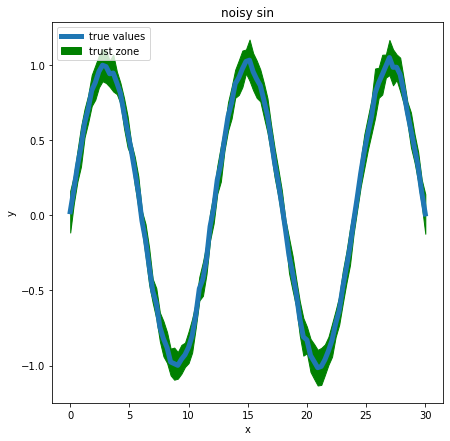

In [394]:
import matplotlib.pyplot as plt

def gen_uncertain_data():
    x = np.linspace(0, 30, 100)
    y = np.sin(x/6*np.pi) + np.random.normal(0, 0.02, size=x.shape)
    error = np.random.normal(0.1, 0.02, size=y.shape)
    return x, y, error

x, y, error = gen_uncertain_data() 

plt.figure(figsize=(7,7))
plt.fill_between(x, y-error, y+error, color='g', label='trust zone')
plt.plot(x, y, lw=5, label='true values')
plt.xlabel("x")
plt.ylabel("y")
plt.title("noisy sin")
plt.legend()
plt.show()

**(0.5 балла) Задача 21.** Bизуализируйте соотношение различных издательств, используя [pie plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-pie).


<AxesSubplot:ylabel='pub amount'>

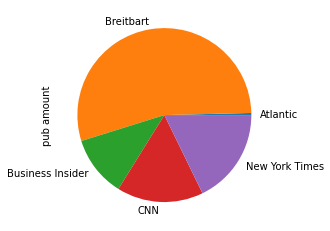

In [398]:
df.groupby('publication').count().id.rename('pub amount').plot.pie()

**(0.5 балла) Задача 22.** Постройте распределение количества публикаций каждого издания по каждому году, используя [bar plot](http://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-barplot). В какой год было больше всего публикаций?

<AxesSubplot:xlabel='publication,year'>

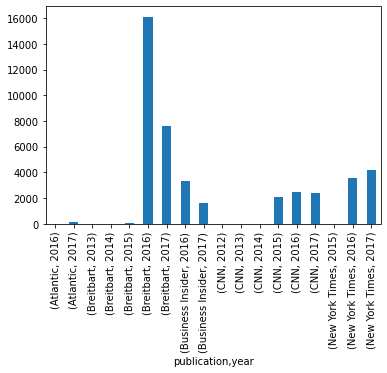

In [410]:
df.groupby(['publication', 'year']).count().id.rename('amount').plot.bar()

**(0.5 балла) Задача 23.** Изобразите распределение длин заголовков (*title*) статей для каждого издательства. Для этого можно воспользоваться, например, функцией [sns.violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html).

<AxesSubplot:xlabel='publication', ylabel='Title length'>

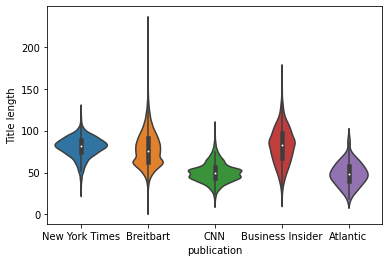

In [430]:
import seaborn as sns

sns.violinplot(x=df.publication, y=df.title.str.len().rename('Title length'))